<a href="https://colab.research.google.com/github/p-rakesh/Python-scripts/blob/main/gold_predict_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing pacakges and importing libraries
!pip install yfinance
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:

# streaming data from yfinance


# df=yf.download("GC=F",start="2017-01-01",end="2023-06-19",interval='1d')
# df=yf.download("BTC-USD",start="2014-01-01",end="2023-06-19",interval='1d')

# apple= yf.download("GLD", start="2017-01-01", end="2023-04-30")
df=yf.download("TSLA",start="2018-01-01",end="2023-06-19",interval='1d')


[*********************100%***********************]  1 of 1 completed


In [ ]:
# function to create and a return in required format
df.to_csv("appleYT.csv")
final=pd.read_csv("appleYT.csv",index_col=0)
final

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2023-06-12,247.940002,250.970001,244.589996,249.830002,249.830002,150337900
2023-06-13,253.509995,259.679993,251.339996,258.709991,258.709991,162384300
2023-06-14,260.170013,261.570007,250.500000,256.790009,256.790009,170575500


In [ ]:
#%cls= df["Date","Close"]
# filter out to get required columns

close= pd.DataFrame(data=df[['Open','Close']],index= None)
close

,Open,Close
Date,,
2018-01-02,20.799999,21.368668
2018-01-03,21.400000,21.150000
2018-01-04,20.858000,20.974667
2018-01-05,21.108000,21.105333
2018-01-08,21.066668,22.427334
...,...,...
2023-06-12,247.940002,249.830002
2023-06-13,253.509995,258.709991
2023-06-14,260.170013,256.790009


In [ ]:
# getting the main x variable to not to eliminate the last days values
close1= close
close1["s_3"]=close1["Close"].shift(-3)
close1['s_3_ewm']=close1['s_3'].ewm(com=0.1).mean()
close1["s_6"]=close1["Close"].shift(-2)
close1['s_6_ewm']=close1['s_6'].ewm(com=0.1).mean()
close1["s_5"]=close1["Close"].shift(-5)
close1['s_5_ewm']=close1['s_5'].ewm(com=0.1).mean()
close1

,Open,Close,s_3,s_3_ewm,s_6,s_6_ewm,s_5,s_5_ewm
Date,,,,,,,,
2018-01-02,20.799999,21.368668,21.105333,21.105333,20.974667,20.974667,22.246000,22.246000
2018-01-03,21.400000,21.150000,22.427334,22.317167,21.105333,21.094444,22.320000,22.313833
2018-01-04,20.858000,20.974667,22.246000,22.252421,22.427334,22.307073,22.530001,22.510497
2018-01-05,21.108000,21.105333,22.320000,22.313860,22.246000,22.251549,22.414667,22.423373
2018-01-08,21.066668,22.427334,22.530001,22.510353,22.320000,22.313777,22.670668,22.648188
...,...,...,...,...,...,...,...,...
2023-06-12,247.940002,249.830002,255.899994,255.989664,256.790009,256.886367,NaN,260.126341
2023-06-13,253.509995,258.709991,260.540009,260.126341,255.899994,255.989664,NaN,260.126341
2023-06-14,260.170013,256.790009,NaN,260.126341,260.540009,260.126341,NaN,260.126341


In [ ]:
# taking the tail values of to give input for the regressor
X_main_1= close1[["s_3_ewm","s_6_ewm","s_5_ewm"]]
X_main_1=X_main_1.tail(1)

In [ ]:
# these variables are done based on the mean of .
#defining x and y variables
close["s_3"]=close["Close"].rolling(3).mean()
close["s_6"]=close["Close"].rolling(6).mean()
close["s_2"]=close["Close"].rolling(2).mean()
close["s_5"]=close["Close"].rolling(5).mean()
close['diff']= close ["Close"]-close['Open']
X_main=close[["s_3","s_6","s_2","s_5"]].tail(1)
close['next_day_price'] = close['Close'].shift(-1)
close= close.dropna()
x= close[["s_3","s_6","s_2","s_5"]]

y= close ['next_day_price']

close.tail(10)
close

,Open,Close,s_3,s_3_ewm,s_6,s_6_ewm,s_5,s_5_ewm,s_2,diff,next_day_price
Date,,,,,,,,,,,
2018-01-09,22.344000,22.246000,21.926222,22.423366,21.545334,22.510344,21.580667,23.098926,22.336667,-0.098000,22.320000
2018-01-10,22.146667,22.320000,22.331111,22.648186,21.703889,22.423365,21.814667,22.982932,22.283000,0.173332,22.530001
2018-01-11,22.349333,22.530001,22.365334,23.098925,21.933889,22.648186,22.125734,23.302691,22.425000,0.180668,22.414667
2018-01-12,22.575333,22.414667,22.421556,22.982932,22.173889,23.098925,22.387600,23.425092,22.472334,-0.160666,22.670668
2018-01-16,22.502666,22.670668,22.538445,23.302691,22.434778,22.982932,22.436267,23.510766,22.542667,0.168001,23.143999
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09,249.070007,244.399994,234.610001,256.886367,226.120000,257.849951,228.550000,260.126341,239.629997,-4.670013,249.830002
2023-06-12,247.940002,249.830002,243.029999,255.989664,232.096667,256.886367,234.994000,260.126341,247.114998,1.889999,258.709991
2023-06-13,253.509995,258.709991,250.979996,260.126341,238.946665,255.989664,242.473999,260.126341,254.269997,5.199997,256.790009


In [ ]:
X_main

,s_3,s_6,s_2,s_5
Date,,,,
2023-06-16,257.743337,254.361666,258.220001,256.354001


In [ ]:
# these varibales can also be obtained by emw
close["s_3"]=close["Close"].shift(-3)
close['s_3_ewm']=close['s_3'].ewm(com=0.15).mean()
close["s_6"]=close["Close"].shift(-6)
close['s_6_ewm']=close['s_6'].ewm(com=0.15).mean()
close["s_5"]=close["Close"].shift(-5)
close['s_5_ewm']=close['s_5'].ewm(com=0.15).mean()
close
x= close[["s_3_ewm","s_6_ewm","s_5_ewm"]]
y= close ['next_day_price']
print (close)

                  Open       Close         s_3     s_3_ewm        s_6  \
Date                                                                    
2018-01-09   22.344000   22.246000   22.414667   22.414667  22.971333   
2018-01-10   22.146667   22.320000   22.670668   22.641129  23.334667   
2018-01-11   22.349333   22.530001   23.143999   23.079380  23.437332   
2018-01-12   22.575333   22.414667   22.971333   22.985398  23.519333   
2018-01-16   22.502666   22.670668   23.334667   23.289122  23.059334   
...                ...         ...         ...         ...        ...   
2023-06-09  249.070007  244.399994  256.790009  256.874145        NaN   
2023-06-12  247.940002  249.830002  255.899994  256.027057        NaN   
2023-06-13  253.509995  258.709991         NaN  256.027057        NaN   
2023-06-14  260.170013  256.790009         NaN  256.027057        NaN   
2023-06-15  248.399994  255.899994         NaN  256.027057        NaN   

               s_6_ewm        s_5     s_5_ewm     

<ipython-input-118-4172a8d60ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close["s_3"]=close["Close"].shift(-3)
<ipython-input-118-4172a8d60ce0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['s_3_ewm']=close['s_3'].ewm(com=0.15).mean()
<ipython-input-118-4172a8d60ce0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)


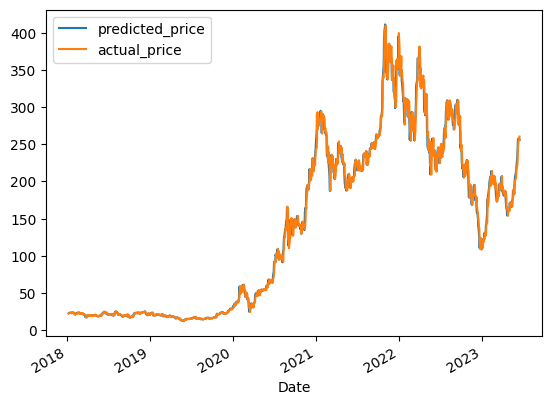

In [ ]:
model=LinearRegression().fit(x_train,y_train)
predict_price=model.predict(x)
predicted_price = pd.DataFrame(predict_price, index=y.index, columns=['price'])
predicted_price.plot()
y.plot()
plt.legend(['predicted_price', 'actual_price'])


In [ ]:
    scoring = "r2"
    results = model_selection.cross_val_score(model, x_train , y_train,scoring=scoring)
    print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())


R squared val:  0.9937852153023794
Standard Deviation:  0.0006735247357594255


In [ ]:
    scoring = "neg_mean_squared_error"
    results = model_selection.cross_val_score(model, x_train, y_train,scoring=scoring)
    print(); print("Mean Squared Error: ", results.mean()); print("Standard Deviation: ", results.std())


Mean Squared Error:  -80.78681497393514
Standard Deviation:  10.815799406220465


In [ ]:
#give the values of x_main

In [ ]:
predicted_price=predicted_price.sort_values(by=['Date'])
predicted_price.tail()

# predicting next day price
#x_current= close[["s_3_ewm","s_6_ewm","s_5_ewm"]].tail(1)
X_main=close[["s_3_ewm","s_6_ewm","s_5_ewm"]].tail(2)
# X_main=close[["s_3","s_6","s_2","s_5"]].tail(4)

y_current=model.predict(X_main_1)
print (X_main_1)
y_current


               s_3_ewm     s_6_ewm     s_5_ewm
Date                                          
2023-06-16  260.126341  260.126341  260.126341


array([259.95101161])

In [ ]:
# creating for prediction of in minute scale
def th_avg(price_t,price_t_1,price_t_2,price_t_3,price_t_4,price_t_5,price_t_6):
  s_3=(price_t+price_t_1+price_t_2)/3
  s_6=(price_t+price_t_1+price_t_2+price_t_3+price_t_4+price_t_5)/6
  s_5=(price_t+price_t_1+price_t_2+price_t_3+price_t_4)/5
  s_2=(price_t+price_t_1)/2
  return s_3,s_6,s_5,s_2

In [ ]:
X_main

,s_3_ewm,s_6_ewm,s_5_ewm
Date,,,
2023-06-14,255.989664,255.989664,255.989664
2023-06-15,255.989664,255.989664,255.989664


In [ ]:
s_3,s_6,s_5,s_2=th_avg(price_t,price_t_1,price_t_2,price_t_3,price_t_4,price_t_5,price_t_6)
df2 = {'s_3': s_3, 's_6':s_6, 's_5': s_5, 's_2':s_2}
X_main= X_main.append(df2,ignore_index=True)

y_current=model.predict(X_main)
X_main

<ipython-input-48-8f5c9ae16449>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_main= X_main.append(df2,ignore_index=True)


ValueError: ignored

In [ ]:
y_current=model.predict(X_main)
y_current

In [ ]:
close1=pd.DataFrame(data=df['Close'],index= None)
close1.tail

In [ ]:
#high variant stock price


In [ ]:
df_1=yf.download("BTC-USD",start='2023-05-01', end= '2023-05-29', interval='5m')
df_1.to_csv("bitcoin.csv")
df=pd.read_csv("bitcoin.csv",index_col=0)
df


In [ ]:
#%cls= df["Date","Close"]

close= pd.DataFrame(data=df[['Open','Close']],index= None)

close
close["s_3"]=close["Close"].rolling(3).mean()
close["s_6"]=close["Close"].rolling(6).mean()
close["s_2"]=close["Close"].rolling(2).mean()
close["s_5"]=close["Close"].rolling(5).mean()
close['diff']= close ["Close"]-close['Open']
X_main=close[["s_3","s_6","s_2","s_5"]].tail(1)
close['next_day_price'] = close['Close'].shift(-1)
close= close.dropna()
x= close[["s_3","s_6","s_2","s_5"]]

y= close ['next_day_price']

close.tail(10)
x

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)
model=LinearRegression().fit(x_train,y_train)
predict_price=model.predict(x)
predicted_price = pd.DataFrame(predict_price, index=y.index, columns=['price'])
predicted_price.plot()
y.plot()
plt.legend(['predicted_price', 'actual_price'])
scoring = "r2"
results = model_selection.cross_val_score(model, x_train , y_train,scoring=scoring)
print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())

predicted_price=predicted_price.sort_values(by=['Datetime'])
predicted_price.tail()

# predicting next day price
x_current= close[["s_3","s_6","s_5","s_2"]].tail(1)
y_current=model.predict(X_main)
y_current
